In [1]:
from keras.models import load_model
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split # to split dataset into train and test
import numpy as np


Using TensorFlow backend.
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  

In [2]:
from sklearn import preprocessing
import pandas as pd

# This function returns a normalized version of the input dataframe 
def normalize(df):
    normalized_df = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        normalized_df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return normalized_df

# This function Standarize by removing mean and scaling to unit variance
# It receives X_train and X_test and returns its update values
def standarization_unit_variance(X_train, X_test):
    # Select numerical columns which needs to be standarized
    train_norm = X_train[X_train.columns]
    test_norm = X_test[X_test.columns]

    # Standarize Training Data
    # Use the mean from train to scale test too
    std_scale = preprocessing.StandardScaler().fit(train_norm)
    X_train_norm = std_scale.transform(train_norm)
    X_test_norm = std_scale.transform(test_norm)

    # Converting numpy array to dataframe
    training_norm_col = pd.DataFrame(X_train_norm, index=train_norm.index, columns=train_norm.columns) 
    testing_norm_col = pd.DataFrame(X_test_norm, index=test_norm.index, columns=test_norm.columns) 
    X_train.update(training_norm_col)
    X_test.update(testing_norm_col)

    return X_train, X_test

In [3]:
## Read and Split Dataset
DATASET_PATH = "emotion-recognition-by-voice/datasets/dataset_48.csv"
df = pd.read_csv(DATASET_PATH, sep=",")
X = df[df.columns[3:51]] # Only the MFCC features
y = df[df.columns[-1]] # Emotion label

# Normalization of input features in X
X = normalize(X)

# Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [4]:
## Load Model from Checkpoint function"
path = 'emotion-recognition-by-voice/models/model_checkpoints/test_model.h5'
model = load_model(path)

In [5]:
## 'Manual' predictions
X_testcnn = np.expand_dims(X_test, axis=2)
preds = model.predict(X_testcnn, 
                         batch_size=16, 
                         verbose=1)

320/320 [==============================] - 1s 2ms/step


In [6]:
preds1=preds.argmax(axis=1)
preds1

array([2, 3, 4, 5, 6, 6, 1, 6, 1, 3, 6, 0, 5, 4, 0, 5, 2, 6, 5, 3, 6, 0,
       3, 6, 5, 6, 3, 0, 2, 6, 2, 4, 0, 3, 3, 6, 3, 3, 1, 0, 5, 3, 2, 5,
       4, 5, 4, 5, 1, 6, 3, 3, 6, 6, 1, 6, 2, 0, 0, 3, 3, 4, 4, 0, 6, 6,
       6, 0, 0, 0, 2, 6, 5, 6, 5, 3, 1, 6, 2, 3, 1, 6, 3, 4, 5, 5, 6, 4,
       2, 1, 1, 6, 3, 0, 6, 2, 0, 5, 3, 2, 3, 6, 5, 5, 6, 6, 5, 0, 0, 3,
       6, 3, 4, 0, 2, 2, 1, 5, 3, 5, 5, 3, 0, 1, 0, 6, 2, 1, 6, 1, 0, 0,
       3, 3, 5, 3, 6, 5, 0, 2, 0, 5, 3, 0, 6, 0, 5, 4, 6, 5, 4, 1, 5, 2,
       6, 6, 1, 0, 2, 3, 1, 6, 3, 6, 4, 0, 4, 2, 6, 3, 0, 1, 6, 3, 2, 2,
       5, 0, 6, 6, 3, 0, 3, 2, 0, 0, 4, 6, 6, 6, 3, 0, 6, 6, 1, 0, 3, 0,
       3, 2, 5, 6, 2, 5, 5, 6, 0, 6, 5, 5, 3, 0, 3, 1, 2, 3, 4, 1, 6, 5,
       1, 6, 5, 0, 3, 5, 0, 6, 3, 0, 4, 5, 1, 6, 1, 4, 0, 6, 6, 6, 4, 2,
       6, 5, 1, 5, 2, 6, 6, 6, 4, 6, 0, 3, 4, 4, 3, 1, 6, 2, 6, 1, 3, 5,
       5, 4, 0, 0, 0, 5, 5, 0, 3, 6, 4, 6, 4, 5, 5, 2, 4, 3, 6, 3, 3, 1,
       0, 1, 1, 6, 3, 6, 3, 6, 0, 5, 1, 5, 5, 0, 0,

NameError: name 'confusion_matrix' is not defined

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, preds1)


In [9]:
cm

array([[14,  6,  1,  7,  4,  9,  8],
       [ 8,  9,  9, 10,  2,  2, 12],
       [ 8,  4,  9,  9,  1,  7,  8],
       [ 2,  5,  5,  8,  4,  2, 15],
       [ 8,  3,  3,  7,  8,  9, 10],
       [ 6,  1,  4,  6,  3, 21,  5],
       [ 5,  3,  1,  8,  4,  2, 15]])

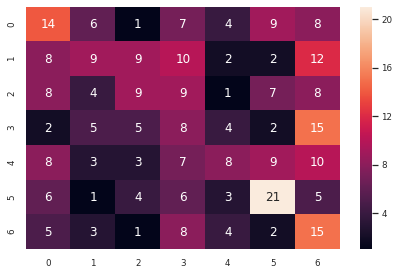

In [33]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm)
sn.set(font_scale=0.8)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.tight_layout()
plt.autoscale()
plt.show()
